<center>

<img src="https://www.infnet.edu.br/infnet/wp-content/uploads/sites/18/2021/10/infnet-30-horizontal-padrao@300x-8-1024x265.png" width="60%"/>
</center>

---

# Algoritmos de Inteligência Artificial para clusterização [25E4_2]
## MIT em Inteligência Artificial, Machine Learning e Deep Learning em Data Science

---


## Análise de agrupamentos



A **análise de agrupamentos** representa um conjunto de técnicas exploratórias muito úteis e que podem ser aplicadas quando há a intenção de se verificar a existência de comportamentos semelhantes entre observações  em relação a determina das variáveis e o objetivo de se criarem grupos, ou clusters,
em que prevaleça a homogeneidade interna.

A análise de conglomerados ou análise de clusters, tem por objetivo principal a alocação de observações em uma quantidade relativamente pequena de agrupamentos homogêneos internamente e heterogêneos entre si e que representem o comportamento conjunto das observações a partir de determinadas variáveis.

A lógica a partir da qual a análise de agrupamentos pode ser elaborada, consiste em:

- Definição das medidas de distância ou de semelhança.
- Definição do esquema de aglomeração.

## Esquema de aglomeração não hierárquico k-means



Dentre os esquemas de aglomeração não hierárquicos, o procedimento k-means é o mais utilizado. Dado que a quantidade de clusters é definida preliminarmente
pelo pesquisador, esse procedimento pode ser elaborado após a aplicação de um esquema hierárquico aglomerativo quando não se tem ideia da quantidade de clusters que podem ser formados e, nessa situação, o output obtido por esse procedimento pode servir de input para o não hierárquico.

### Objetivo do k-means



Dado um conjunto de dados com $n$ amostras e $m$ variáveis, o objetivo do $K$-Means é dividir esses dados em $K$ grupos (clusters) de tal forma que:

- Os pontos dentro de um mesmo cluster sejam o mais semelhantes possível.
- Os pontos de clusters diferentes sejam o mais diferentes possível.

A similaridade é geralmente medida pela **distância Euclidiana** entre os pontos.

### Funcionamento do k-means



1. Inicialização dos centróides

  - O usuário define previamente o número $K$ de clusters desejados.
  - São escolhidos $K$ pontos iniciais (chamados de centróides) de forma aleatória dentro do espaço dos dados.

2. Atribuição dos pontos aos clusters

Para cada ponto no conjunto de dados:

  - Calcula-se a distância do ponto para cada um dos $K$ centróides.
  - O ponto é atribuído ao cluster do centróide mais próximo.

3. Atualização dos centróides

Após a atribuição de todos os pontos:

  - Os centróides são recalculados como a média aritmética dos pontos pertencentes a cada cluster.
  - Isso significa que cada novo centróide passa a ser a posição média dos pontos atribuídos a ele.

4. Repetição até a convergência
  - Os passos 2 e 3 são repetidos iterativamente até que não haja mais mudanças significativas nos centróides ou os clusters não mudem mais.
  - O critério de parada pode ser:
    - Um número máximo de iterações.
    - A variação dos centróides ser menor que um limite pré-definido.


- [Visualizando o K-Means](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

### K-Means from scratch

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("Seaborn version:", sns.__version__)

Numpy version: 2.3.4
Pandas version: 2.3.3
Matplotlib version: 3.10.7
Seaborn version: 0.13.2


In [4]:
import math
import random

#metrica de similaridade: distancia euclidiana
def euclidean_distance(point1, point2):
  dist = math.sqrt(
      sum(
         (p1 - p2) ** 2  for p1, p2 in zip(point1, point2)
      )
  )

  return dist

def initialize_centroids(data:list, k):
  data_list = data.tolist()

  centroids = random.sample(data_list, k)

  return centroids

def assign_clusters(data, centroids):

  clusters = [[] for _ in range(len(centroids))]

  for point in data:
    distances = [euclidean_distance(point, centroid) for centroid in centroids]
    cluster_index = distances.index(min(distances))
    clusters[cluster_index].append(point)

  return clusters

def update_centroids(clusters, old_clusters):

  new_centroids = list()

  for i, cluster in enumerate(clusters):
    if cluster:
      new_centroid = [sum(dim)/len(cluster) for dim in zip(*cluster)]
    else:
      new_centroid = old_clusters[i]

    new_centroids.append(new_centroid)

  return new_centroids

def k_means_from_scracth(data, k, max_iterations=100):

  centroids = initialize_centroids(data, k)

  for _ in range(max_iterations):

    clusters = assign_clusters(data, centroids)
    new_centroids = update_centroids(clusters, centroids)

    centroids = new_centroids

  return centroids, clusters


In [5]:
from sklearn.datasets import make_blobs

In [6]:
X, labels = make_blobs(n_samples=500, n_features=2, centers=3, random_state=12)

In [7]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

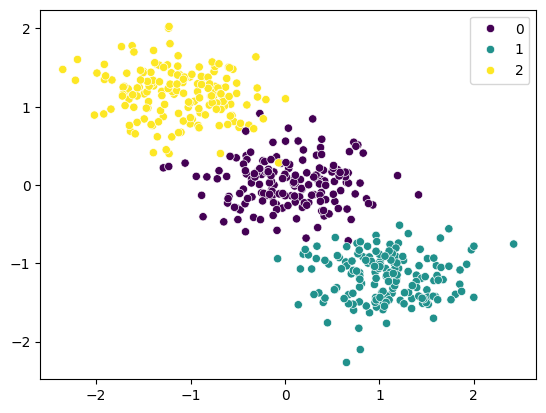

In [8]:
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette='viridis')
plt.show()

In [9]:
centroids, clusters = k_means_from_scracth(X_scaled, 3)

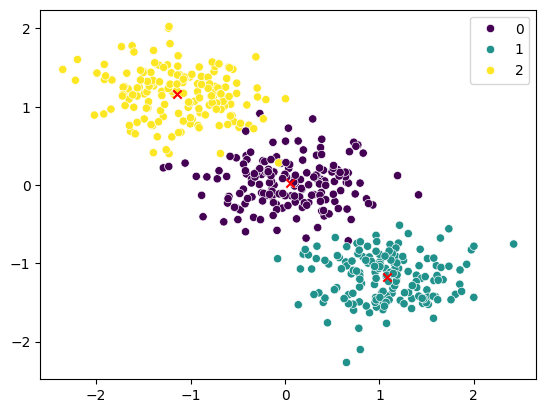

In [10]:
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette='viridis')

for centroid in centroids:
  plt.scatter(centroid[0], centroid[1], marker='x', color='red')

plt.show()

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [13]:
kmeans.cluster_centers_

array([[ 1.07204956, -1.16237559],
       [-1.14491445,  1.15961394],
       [ 0.03945865,  0.03751371]])

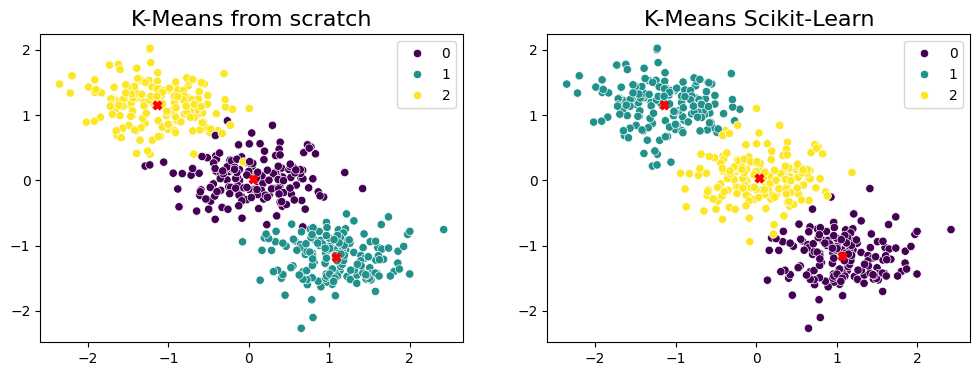

In [14]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# kmeans from scratch
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette='viridis', ax=ax[0])
ax[0].scatter(
    [x for x, _ in centroids],
    [y for _, y in centroids],
    marker='X',
    color='red'
)
ax[0].set_title('K-Means from scratch', fontsize=16)


# sklearn
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=kmeans.labels_, palette='viridis', ax=ax[1])
ax[1].scatter(
    [x for x, _ in kmeans.cluster_centers_],
    [y for _, y in kmeans.cluster_centers_],
    marker='X',
    color='red'
)
ax[1].set_title('K-Means Scikit-Learn', fontsize=16)

plt.show()

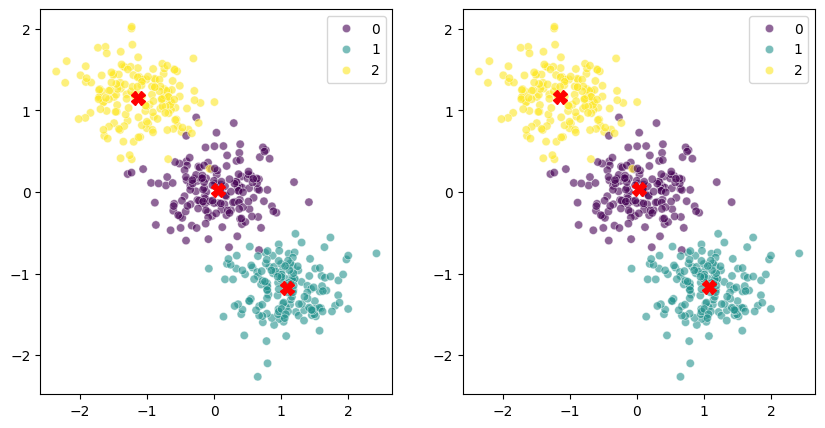

In [15]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))

#from scratch
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='viridis', alpha=0.6, ax=ax[0])
ax[0].plot(
    [x for x, _ in centroids],
    [y for _, y in centroids],
    'X',
    color='red',
    markersize=10
)

#sklearn k-means
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='viridis', alpha=0.6, ax=ax[1])
ax[1].plot(
    [x for x, _ in kmeans.cluster_centers_],
    [y for _, y in kmeans.cluster_centers_],
    'X',
    color='red',
    markersize=10
)

plt.show()

In [16]:
labels_from_scratch = list()
for point in X_scaled:
  for i, cluster in enumerate(clusters):
    for point_cluster in cluster:
      if point in point_cluster:
        labels_from_scratch.append(i)
        break
    # Check if the point is in the current cluster
    # if np.any(np.all(point == cluster, axis=1)):
    #   labels_from_scratch.append(i)
    #   break

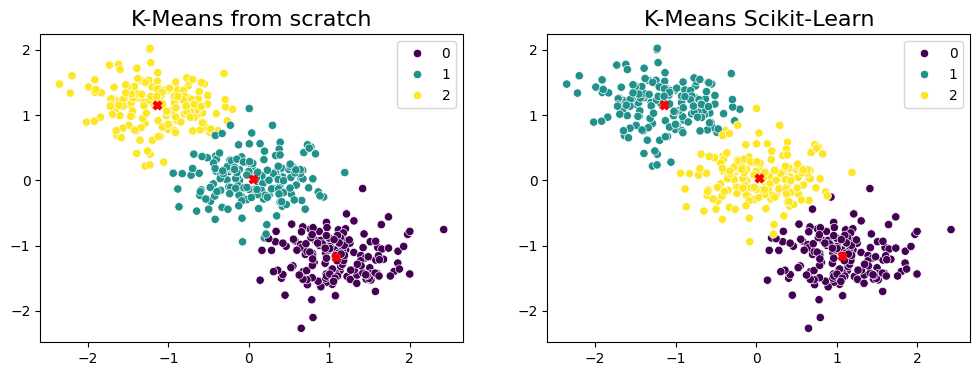

In [17]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# kmeans from scratch
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels_from_scratch, palette='viridis', ax=ax[0])
ax[0].scatter(
    [x for x, _ in centroids],
    [y for _, y in centroids],
    marker='X',
    color='red'
)
ax[0].set_title('K-Means from scratch', fontsize=16)


# sklearn
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=kmeans.labels_, palette='viridis', ax=ax[1])
ax[1].scatter(
    [x for x, _ in kmeans.cluster_centers_],
    [y for _, y in kmeans.cluster_centers_],
    marker='X',
    color='red'
)
ax[1].set_title('K-Means Scikit-Learn', fontsize=16)

plt.show()

---

__Licensa__

![](https://drive.google.com/uc?export=view&id=1Uq7UxJPT9ytP0ABv8hYNWo9ciDZB7guX)

*This work is licensed under the Creative Commons Attribution-NonCommercial 4.0 International License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc/4.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.*